In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
caminho = os.path.join('..', 'dados', 'Data Sets- STATA')

## C1

In [2]:
filename = os.path.join(caminho, '401K.DTA')
df = pd.read_stata(filename, preserve_dtypes=False)
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


In [3]:
df.describe()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,87.362907,0.731512,1354.230769,1628.534550,13.181226,3568.495437,0.487614,6.686034
std,16.716537,0.779539,4629.264665,5370.719356,9.171114,11217.939519,0.500010,1.453375
min,3.000000,0.010000,50.000000,51.000000,4.000000,58.000000,0.000000,4.060443
25%,78.025000,0.300000,156.250000,176.000000,7.000000,261.000000,0.000000,5.564520
50%,95.699997,0.460000,276.000000,330.000000,9.000000,588.000000,0.000000,6.376725
75%,100.000000,0.830000,749.500000,890.500000,18.000000,1804.000000,1.000000,7.497761
max,100.000000,4.910000,58811.000000,70429.000000,51.000000,144387.000000,1.000000,11.880253


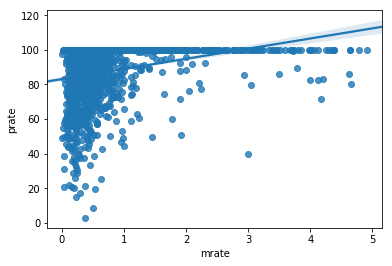

In [4]:
%matplotlib inline
import seaborn as sns
sns.regplot(x='mrate', y='prate', data=df)

In [5]:
model = smf.ols(formula='prate ~ mrate', data=df)
results = model.fit()

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.10e-27
Time:                        20:38:51   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.0755      0.563    147.484      0.0

In [7]:
# item iii
results.params

Intercept    83.075455
mrate         5.861079
dtype: float64

In [8]:
# item iv
results.predict(exog=dict(mrate=[3.5]))

0    103.589233
dtype: float64

In [9]:
# item v - 5,8%
v = results.params['mrate'] / 100
v

0.058610791896674064

## C8

xi mean 4.77 xi std 2.81


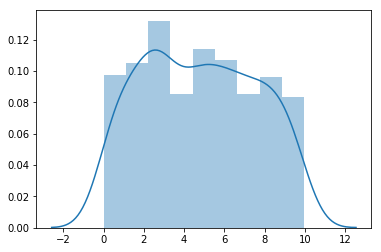

In [10]:
import numpy as np
# i 
xi = np.random.uniform(0, 10, 500)
print('xi mean %.2f xi std %.2f' % (xi.mean(), xi.std()))
sns.distplot(xi)

ui mean 0.56 ui std 5.64


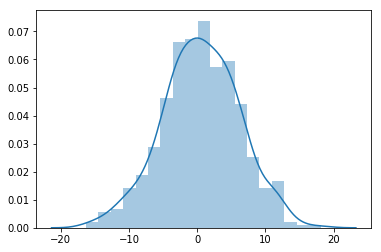

In [11]:
#ii
ui = np.random.normal(0, 6, 500)
print('ui mean %.2f ui std %.2f' % (ui.mean(), ui.std()))
sns.distplot(ui)

yi mean 11.10 yi std 8.03


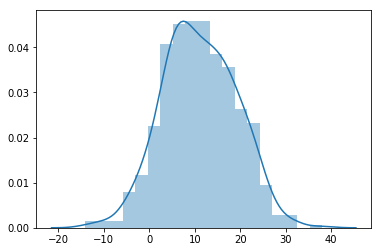

In [12]:
#iii
yi = np.array([1 + 2*x + u for x, u in zip(xi, ui)])
print('yi mean %.2f yi std %.2f' % (yi.mean(), yi.std()))
sns.distplot(yi)

In [13]:
X = sm.add_constant(xi)
model = smf.OLS(yi, X)
results = model.fit()
p = results.params
print(p)
y_hat = results.predict(X)

[1.38361529 2.03596495]


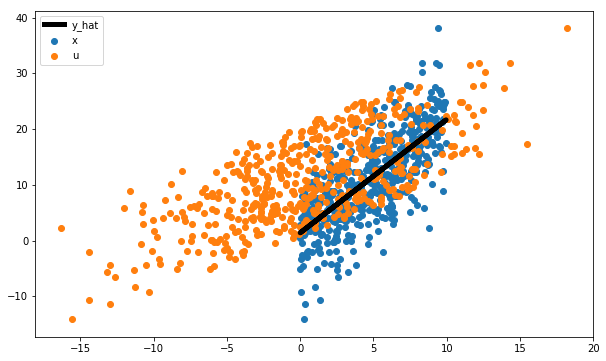

In [14]:
import matplotlib.pyplot as plt
x = np.arange(-18, 18)
plt.figure(figsize=(10, 6))
plt.scatter(x=xi, y=yi, label='x')
plt.scatter(x=ui, y=yi, label='u')
plt.plot(xi, y_hat, label='y_hat', color='black', linewidth=5.0)
l = plt.legend()


In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     512.2
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.64e-78
Time:                        20:38:52   Log-Likelihood:                -1574.1
No. Observations:                 500   AIC:                             3152.
Df Residuals:                     498   BIC:                             3161.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3836      0.498      2.779      0.0

res mean -0.00 res std 5.64


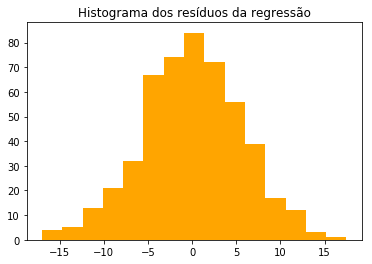

In [16]:
# iv
res = yi - y_hat
print('res mean %.2f res std %.2f' % (res.mean(), res.std()))
plt.hist(res, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()


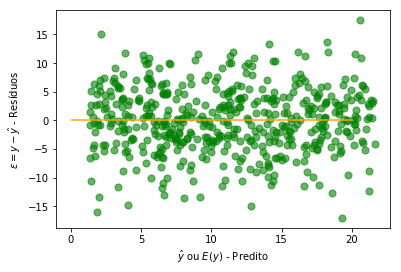

In [17]:
plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=0, xmax=20, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

## C9

In [18]:
filename = os.path.join(caminho, 'countymurders.dta')
county_murders = pd.read_stata(filename, preserve_dtypes=False)
county_murders.head()

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,2.0,1001,54.049999,32216.0,20.629999,15.28,22.330000,40.250000,167.669998,8780.799805,29.160000,1980,2,0.620810,0.620809,1,1,0,10.380219,0.0
1,3.0,1001,53.660000,31984.0,20.190001,15.55,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
2,2.0,1001,53.750000,32036.0,19.660000,15.73,21.799999,40.419998,166.630005,8327.610352,71.410004,1982,3,0.936446,0.624298,1,1,0,10.374616,0.0
3,7.0,1001,53.779999,32056.0,19.100000,15.88,21.530001,40.470001,176.529999,8545.549805,72.220001,1983,7,2.183679,2.183679,1,1,0,10.375239,0.0
4,3.0,1001,53.910000,32128.0,18.539999,15.92,21.260000,40.509998,166.250000,8965.160156,40.360001,1984,2,0.622510,0.933765,1,1,0,10.377483,0.0


In [19]:
# i
county_murders['murders'].describe()

count    37349.000000
mean         7.286915
std         47.217586
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1944.000000
Name: murders, dtype: float64

In [20]:
cm1996 = county_murders[county_murders['year'] == 1996]
county_zero = cm1996[cm1996['murders'] == 0].groupby('countyid')
county_nozero = cm1996[cm1996['murders'] > 0].groupby('countyid')
print('%d condados com zero assassinatos\n' % len(county_zero) +
      '%d condados com mais de um assassinato\n' % len(county_nozero) +
      '%d maior numero de assassinatos' % cm1996['murders'].max()
     )

1051 condados com zero assassinatos
1146 condados com mais de um assassinato
1403 maior numero de assassinatos


In [21]:
murder_model = smf.ols(formula='murders ~ execs', data=cm1996)
murder_reg = murder_model.fit()
print(murder_reg.summary())
y_hat_murder = murder_reg.predict()

                            OLS Regression Results                            
Dep. Variable:                murders   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     100.8
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           3.25e-23
Time:                        20:38:53   Log-Likelihood:                -11159.
No. Observations:                2197   AIC:                         2.232e+04
Df Residuals:                    2195   BIC:                         2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4572      0.835      6.537      0.0

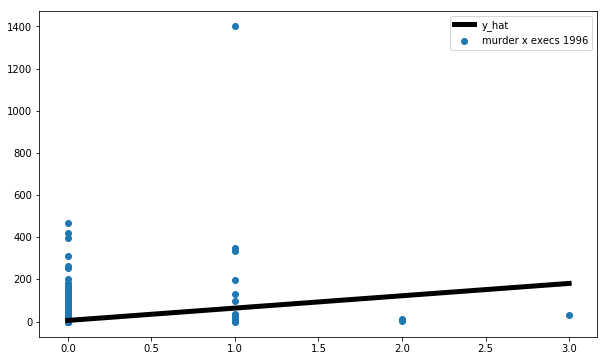

In [22]:
x = np.arange(0, cm1996['execs'].max() + 1)
y_hat_ = murder_reg.predict(exog={'execs':x})
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat_, label='y_hat', color='black', linewidth=5.0)
plt.scatter(x=cm1996['execs'], y=cm1996['murders'], label='murder x execs 1996')
l = plt.legend()

In [23]:
# iv
print('iv - O resultado é igual ao intercepto %.2f' % murder_reg.params[0])

iv - O resultado é igual ao intercepto 5.46


# C10

In [25]:
filename = os.path.join(caminho, 'catholic.dta')
catholic = pd.read_stata(filename, preserve_dtypes=False)
catholic.head()

,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
0,124902.0,61.410000,49.770000,0,0,0,0,14.0,12.0,10.308952,1.0,0,1
1,124915.0,58.340000,59.840000,0,0,0,0,14.0,14.0,10.308952,1.0,0,1
2,124916.0,59.330002,50.380001,1,0,0,0,14.0,11.0,10.308952,1.0,0,1
3,124932.0,49.590000,45.029999,1,0,0,0,12.0,14.0,10.308952,1.0,0,1
4,124944.0,57.619999,54.259998,1,0,0,0,12.0,12.0,10.657259,1.0,0,1


In [80]:
catholic.describe()

,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
count,7.430000e+03,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,5970.000000,7430.000000,7430.000000
mean,4.589838e+06,51.772402,52.133623,0.517362,0.051682,0.103499,0.070659,13.356864,13.674159,10.353324,0.930318,0.060834,0.345895
std,2.744467e+06,9.407761,9.459117,0.499732,0.221400,0.304630,0.256272,2.005982,2.267797,0.794519,0.254631,0.239042,0.475691
min,1.249020e+05,29.150000,29.500000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,6.214608,0.000000,0.000000,0.000000
25%,2.424049e+06,44.525001,45.020000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,10.021271,1.000000,0.000000,0.000000
50%,4.592442e+06,53.080002,52.529999,1.000000,0.000000,0.000000,0.000000,14.000000,14.000000,10.308952,1.000000,0.000000,0.000000
75%,7.241106e+06,59.470001,59.857500,1.000000,0.000000,0.000000,0.000000,14.000000,16.000000,10.657259,1.000000,0.000000,1.000000
max,7.979086e+06,68.089996,71.370003,1.000000,1.000000,1.000000,1.000000,18.000000,18.000000,12.345835,1.000000,1.000000,1.000000


array([[1.        , 0.71041336],
       [0.71041336, 1.        ]])

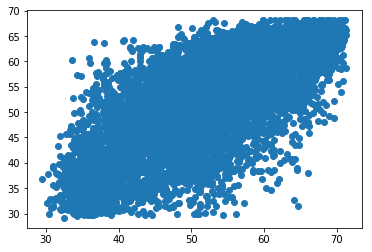

In [39]:
plt.scatter(catholic['math12'], catholic['read12'])
np.corrcoef(catholic['math12'], catholic['read12'])

In [81]:
# i
print('RESPOSTAS i')
print(f'número de estudantes na amostra {len(catholic)}')
print(f'math12 mean {catholic["math12"].mean():.2f}')
print(f'math12 std {catholic["math12"].std():.2f}')
print(f'read12 mean {catholic["read12"].mean():.2f}')
print(f'read12 std {catholic["read12"].std():.2f}')

RESPOSTAS i
número de estudantes na amostra 7430
math12 mean 52.13
math12 std 9.46
read12 mean 51.77
read12 std 9.41


In [82]:
# ii
x = catholic['read12']
y = catholic['math12']
y_bar = y.mean()
cmodel =smf.ols(formula='math12 ~ read12', data=catholic)
creg = cmodel.fit()
y_hat = creg.predict()
print(creg.params)

Intercept    15.153038
read12        0.714291
dtype: float64


In [84]:
sst = np.sum((y - y_bar ) ** 2) # Soma total dos quadrados
print(sqt)
srt = np.sum((y_hat - y) ** 2) # Soma dos resíduos
print(srt)
r_squared = 1 - srt/sst
print(r_squared)
b0 = creg.params['Intercept']
b1 = creg.params['read12']
srt_manual = np.sum((y - (b0 + b1 * x)) ** 2)
print(srt_manual)

664709.0434328265
329238.9323502146
0.5046871475527224
329238.9323502146


### Resp ii

In [83]:
print(f'math2  = {b0:.2f} + {b1:.2f}xread13, n={len(catholic)}, r²={r_squared:.4f}' )

math2  = 15.15 + 0.71xread13, n=7430, r²=0.5047


In [74]:
print(creg.summary())

                            OLS Regression Results                            
Dep. Variable:                 math12   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7569.
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:14:04   Log-Likelihood:                -24627.
No. Observations:                7430   AIC:                         4.926e+04
Df Residuals:                    7428   BIC:                         4.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1530      0.432     35.074      0.0

### Resposta iii, iv e v:
O intercepto não tem significado prático, provavelmente representa uma aproximação das notas mínimas da amostra.
Conforme demonstrado acima, a correlação entre math12 e read12 é alta, portanto fica-se num dilema "ovo ou galinha". Não há causalidade real, mas simplesmente correlação. Conforme demonstrado abaixo, a regressão "contrária" dá resultado muito parecido, quase idêntico.

In [87]:
cmodel =smf.ols(formula='read12 ~ math12', data=catholic)
creg = cmodel.fit()
print(creg.summary())

                            OLS Regression Results                            
Dep. Variable:                 read12   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7569.
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:26:48   Log-Likelihood:                -24587.
No. Observations:                7430   AIC:                         4.918e+04
Df Residuals:                    7428   BIC:                         4.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9371      0.430     34.712      0.0